# 18. Batch Normalization
At this point we should know that normalizing our data for machine learning models is typically a good idea. That is when we make all of the input features have mean of 0 and variance of 1. 

We accomplish this by subtracting by the mean and dividing by the standard deviation of the data. 

$$X_{normalized} = \frac{X - \mu}{\sigma}$$

Recall, the reason we want to do this is because this is the region where our nonlinear activation functions are the most active/dynamic - aka that is where they change the most. 

So, how can we think of batch normalization? Well, instead of making normalization part of the preprocessing stage, we make it part of the neural network itself. 

<br>
<img src="https://drive.google.com/uc?id=1xqSR6pG4sBxQxJ4GSfDsVv1Pjy6XboTL">

<img src="https://drive.google.com/uc?id=1U9J3qgn-M1i9w6OKhGVmXZXxZ69K9jy_">

However, what makes this useful is that we perform normalization at every layer! Recall, that each layer of a neural network is like a little logisitic regression. So rather than just normalize the data once, we will normalize it before we do every little logistic regression. 

---

<br>
# 2. Exponentially Smoothed Averages
We are going to take a minute to dig into something that may seem straight forward: How to calculate an average. The first thought we all have when being asked to do this is: Why not just add all of the sample data points, and then divide by the number of data points, resulting in the sample mean:

$$\bar{X}_N = \frac{1}{N}\sum_{n=1}^NX_n$$

But now let's suppose that you have a large amount of data-so much so that all of your X's cannot fit into memory at the same time. Is it still possible to calculate the sample mean? Yes it is! We can read in one data point at a time, and then delete each data point after we've looked at it. It is shown below that the current sample mean can actually be expressed in terms of the previous sample mean and the current data point.

$$\bar{X}_N =  \frac{1}{N}\sum_{n=1}^NX_n = \frac{1}{N}\Big((N-1)\bar{X}_{N-1} + X_N \Big) = (1 - \frac{1}{N})\bar{X}_{N-1}+\frac{1}{N}X_N$$

We can then express this using simpler symbols. We can call $Y$ our output, and we can use $t$ to represent the current time step:

$$Y_t = (1 - \frac{1}{t})Y_{t-1} + \frac{1}{t}X_t$$

Great, so we have solved our problem of how to calculate the sample mean when we can't fit all of the data into memory, but we can see that there is this $\frac{1}{t}$ term. This says that as $t$ grows larger, the current sample has less and less of an effect on the total mean. Clearly this makes sense, because as $t$ grows that means the total number of $X$'s we've seen has grown. We also decrease the influence of the previous $Y$ by $1 - \frac{1}{t}$. This means that each new $Y$ is just part of the old $Y$, plus part of the newest $X$. But in the end, it balances out to give us exactly the sample mean of $X$. 

For convenience we can call this $\frac{1}{t}$ term $\alpha_t$. What if we were to say that we did not want $\alpha$ to be $\frac{1}{t}$? What if we said that we wanted each data point to matter equally at the time that we see it, so that we can set alpha to be a constant? Of course, $\alpha$ needs to be less than 1 so that we don't end up negating the previous mean. 

$$0 < \alpha_t = constant < 1 $$
$$Y_t = (1 - \alpha)Y_{t-1} + \alpha X_t$$

So what does this give us? 

### 2.1 The Exponentially-smoothed average
This gives us what is called the exponentially smoothed average! We can see why it is called exponential when we express it in terms of only $X$'s. 

$$Y_t = (1 - \alpha)^tY_0 + \alpha \sum_{\tau = 0}^{t - 1}(1- \alpha)^\tau X(t- \tau)$$

If the equation above is not clear, the expansion below should clear up where everything is coming from and *why* this is called exponential. Let's say we are looking at $Y_{100}$:

$$Y_{100} = (1-\alpha)^{100}Y_0 + \alpha * X_{100} + \alpha * (1 - \alpha)^1*X_{99} + \alpha * (1 - \alpha)^2 * X_{98}+ ...$$

We can see the exponential term start to accumulate along the $(1 - alpha)$! Now, does this still give us the mean, aka the expected value of $X$? Well, if you take the expected value of everything, we can see that we arrive at the expected value of $X$:

$$(1 - \alpha)E[y(t-1)] + \alpha E[X(t)] = (1-\alpha)E(X) + \alpha E(X) = E(X)$$

We do arrive at the expected value of $X$, so we can see that the math does checkout! Of course, this is assuming that the distribution of $X$ does not change over time. Note that if you have come from a signal processing background, you may recognize this as a **low-pass filter**. Another way to think about this is that you are saying *current values matter more*, and *past values matter less* in an exponentially decreasing way. So, if $X$ is not stationary (meaning it's distribution changes over time), then this is actually a better way to estimate the mean (average) then weighting all data points equally over all time.


---

<br>
# 3. Batch Normalization - Theory
Recall, before we input any of our data in ML algorithms, we like to normalize the data first. Normalization means subtracting the mean, and dividing by the standard deviation. This forces our data to have a mean of 0 and a variance of 1. We like to do this because it keeps our inputs in a specific range, and we know that our sigmoid and tanh functions are most saturated when the inputs are small. 

What **batch normalization** does, is that instead of you normalizing the data manually, before putting it into the neural network, normalization will occur at every layer of the neural network. You can think of it as building normalization into the neural net vs. doing the calculation yourself before it is input into the neural net. So, the normalization occurs at the neural network level, and not the data level. 

<br>
## 3.1 How does it really work?
First and foremost, it should be known that the name batch normalization comes from the fact that we will be doing batch gradient descent. In other words, during training we will be looking at a small batch of data and doing one gradient descent step on that, looking at the next batch, and so on. 

So, it is called batch normalization because the mean and standard deviation that we calculate are the sample mean and sample standard deviation of the batch. Keep in mind that this only applies during training, because it is only during training that we will have batches of data. 

```
X_B = next batch of data
mu_B = mean(X_B)
sigma_B = std(X_B)
Y_B = (X_B - mu_B) / sigma_B
```

You may still wonder, "when does batch normalization actually happen?" Well, batch normalization happens right before we pass it through the activation function. So, before we had two steps: 
1. Do the linear transformation
2. Then pass it through the activation function. 

<img src="https://drive.google.com/uc?id=1jZ3iK4bpIz_Ul4zoa-RQ7OJ8jnph-kai" width="700">

With batch gradient descent, we have 3 steps:
1. Do the linear transformation
2. Perform batch normalization 
3. Then pass it through the activation function

<img src="https://drive.google.com/uc?id=1qsMJH3yIEJc1czwGN14GYeKPylqGOyHR" width="700">

<br>
### 3.1.1 Naming Convention
One important thing to remember is that we are going to call the input to batch normalization $X$, and the output $Y$. This may be confusing at first since generall the input to the neural network is referred to as $X$ and the output is referred to as $Y$. So, for this lecture only does $X$ refer to the inputs of batch normalization and $Y$ refers to the outputs of batch normalization. 

<br>
## 3.2 Missing Step
Now, so far this may seem very simple. You have a batch of activations, you calculate their mean and standard deviation, you standardize the activations, and then pass it through the activation function as normal. Note, we often add a small number to denominator in order to prevent dividing by 0 if the variance of the batch is 0.

```
X_B = next batch of data (Note: X refers to activation here)
mu_B = mean(X_B)
sigma_B_squared = var(X_B)
Y_B = (X_B - mu_B)/ sqrt(sigma_B_squared + epsilon)
```

However, at this point we are missing one crucial and slightly counter intuitive step! This step comes right before we pass through the activation function. So, what was shown previously was actually missing a step. So, right after normalize the data, we actually scale it back. Right after standardizing the data, we actually scale it to something else, giving it a different mean and different standard deviation. We call this second scale parameter $\gamma$, and the second location parameter $\beta$. 

$$\hat{X}_B = \frac{X_B - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$
$$Y = \gamma\hat{X}_B + \beta$$

This may seem very counterintuitive, because this entire concept was motivated with the idea that standardization is good. So, why are we now unstandardizing our data by multiplying by $\gamma$ and adding $\beta$? The reason is that standardization may not be good, but we do not know. So, **we let the neural network decide by using gradient descent**. In other words, we will optimize $\gamma$ and $\beta$ to do whatever is best. 

Note, these parameters will be updated using back propagation, just like all of the other weights in the neural network. Luckily, now that we know theano and tensorflow, we don't have to worry about taking any derivatives, and we can just focus on how the neural network was built. 

<br>
## 3.3 Letting the Neural Network learn what is best
So, lets suppose that standardization is good. Then, the neural network will learn that $\gamma$ should be close to 1, and $\beta$ should be close to 0. However, if standardization is bad and something else will lead to better results, then the neural network will learn a better $\gamma$ and a better $\beta$ - aka they will be whatever minimizes the cost! In other words, the neural network is learning through gradient descent what the best scale and shift of the data should be. This is not necessarily 1 and 0, it is whatever minimizes our cost function. 

## 3.4 Another Problem
So, we now know how to train a neural network with batch gradient descent, but we still have another problem. Let's say it is now time to do prediction; we can say we have 1 sample input, and we would like to calculate a prediction for it. Well, we can't do what we have been doing! Because if we subtract the mean of one sample from the sample itself, we would just get a vector of 0s. So, clearly this is not what we want to do during test time. 

What would be nice is if we kept track of all the sample means and sample standard deviations we saw during training, we could calculate an overall (global) mean and overall (global) standard deviation, and use those during test time! This is exactly what we do; we keep a running mean and running variance! This will look similar to RMSprop and Adam Smoothing, since it is an exponentially smoothed average! We keep a running mean and running variance, and we do this using exponential smoothing. We will call our global mean $\mu$ and our global variance $\sigma^2$.

```
for each batch B:
    mu = decay*mu + (1 - decay)*mu_B
    sigma_squared = decay*sigma_squared + (1 - decay)*sigma_B_squared
```

Now, theoreticall you could just calculate the global mean and global variance to the be the mean and variance of all of your training data:
$$\mu = mean(X_{train})$$
$$\sigma^2 = var(X_{train})$$

The problem with that is that it does not scale if your data is too large. At the same time, that may be a simpler way to think of $\mu$ and $\sigma$.

## 3.5 Test/Prediction 
During test time, based on our above discussion:

$$\hat{x}_{test} = \frac{x_{test} - \mu}{\sqrt{\sigma^2 + \epsilon}}$$
$$y_{test} = \gamma \hat{x}_{test} + \beta$$

Where $\mu$ and $\sigma$ are whatever we calculated during training. 

## 3.6 Implementation
Now, in order to implement these, you could do it manually. However, there are functions that are built into both theano and tensorflow that can help us. For tensorflow that is:

**TensorFlow Implementation**<br>
```
tf.nn.batch_normalization
# or
tf.contrib.layers.batch_norm
```

And for Theano:
**Theano Implementation**<br>
```
from theano.tensor.nnet.bn import batch_normalization_train,
batch_normalization_test
```

One thing to keep in mind is that these are all element wise operations. So, this applies equally to scalars and vectors. 

## 3.7 Theory
So, after all of this discussion on the mechanics of batch normalization, you may still be wondering, how does batch normalization actually help? Well, the authors of the paper that introduced batch gradient descent mention **internal covariant shift**. That sounds very complicated, however, covariate is really just another term for input features, so we can call that X. By shift, they mean that as we perform batch gradient descent the distribution of X may change as we change the network. Aka, this is saying that the distribution of input features can change during training. 

What happens when the data shifts is that the weights then have to compensate, because what they expected the data to look like before is not what it looks like now. So, if you input data has changed then all of the weights in front of it in the neural network will then have to change. The authors claim that this increases training time, because it requires lowering the learning rate and careful weight initialization. 

But, lets say we do batch normalization, and the data in each layer is normalized. Let's assume the ideal case where all of the data is precisely of mean 0 and variance 1. Well, now the weights won't have to adapt to different looking data, because all of the data looks the same. 

This has two effects that have been shown by the authors of the original paper. 
1. First, it allows us to increase the learning rate, leading to faster training. 
2. Secondly, it acts like a regularizer. Because the inputs no longer have to take on extreme values, neither will the weights. It has been demonstrated that sometimes by including batch normalization in the network, you can eliminate the need for dropout regularization, since BN is already doing something like regularization. 

One final note: Usually a neural network has a weight matrix and bias vector as parameters. However, we no longer need the bias because the batch normalization already shifts the data!

---

<br>
# 4. Batch Normalization in Tensorflow
To implement batch normalization in tensorflow, we will be using the built in `tf.nn.batch_normalization` function. So, let's begin by discussing what tensorflows batch normalization function actually does. Well, we can start by looking at the interface. 

```
output = batch_normalization(
    x, # input
    mean, 
    variance, 
    offset, # beta
    scale, # gamma
    epsilon
)
```

We can see that after a quick glance at the function signature, you may notice that the function is actually pretty useless. Firstly, it takes in the mean and variance, which means you have to calculate these things yourself. But, it also doesn't specify what the mean and variance are. Remember, there are two different modes for batch norm, training and testing. When training we use the sample mean and sample variance from the batch (batch_mean and batch_variance). When we are testing we use the overall mean and overall variance from the full training set (global_mean and global_variance). 

So, in actuality, this function does very little. It does this one calculation and that is pretty much it:

```
y' = (x - mean) / sqrt(var + epsilon)
y = y' * gamma + beta
```

Other things like calculating the batch mean and batch variance during training must be done manually. We also need to update the running mean and running variance as well. 

So, in pseudocode, if you image we have a forward function which takes in an input batch X and an `is_training` flag, our code would look like:

**Pseudocode Incomplete**
```
def forward(X, is_training):
    a = X.dot(W)    # no bias because this is redundant
    if is_training:
        # Still need to calculate batch_mean and batch_var
        out = batch_normalization(a, batch_mean, batch_var, beta, gamma)
    else:
        out = batch_normalization(a, running_mean, running_var, beta, gamma)
    return f(out)
```

This is still incomplete however, because we need to calculate the batch mean and batch variance from X. We can do that using the `tf.nn.moments` function:

**Pseudocode with tf.nn.moments**
```
def forward(X, is_training):
    a = X.dot(W)    # no bias because this is redundant
    if is_training:
        batch_mean, batch_var = tf.nn.moments(a, [0])
        out = batch_normalization(a, batch_mean, batch_var, beta, gamma)
    else:
        out = batch_normalization(a, running_mean, running_var, beta, gamma)
    return f(out)
```

Of course, this is still incomplete because we haven't specified how to update the running mean and running variance. Recall, these need to be updated every time we call the train_op. But, unlike all of the other parameters of the neural network, they are not being optimized using gradient descent. They are just the exponentially smoothed average of the batch mean and batch variance. Also, don't forget that because the running mean and running variance are things that need to be updated, we are going to make them variables in the tensorflow graph. 

This may seem problematic, because with tensorflows optimizers they will automatically do gradient descent on all variables in the graph. So, it may seem like the running mean and variance may be updated in a way that we don't want them to be update. However, the fix for this is that the tensorflow variable constructor takes in an arugment called trainable which you can set to false! 

```
running_mean = tf.Variable(initial_value, trainable=False)
```

This will ensure that these variables are not being updated during gradient descent. So, at this point how do we update the running mean and variance? The way to do this is using the tf.assign function. The first argument is the variable you want to update, and the second argument is the update expression (similar to how theano updates work). Now, in order to make sure that these updates get run every time we call train, we have to use the function `tf.control_dependencies`, and pass in the update ops we just created. Luckily, everything is encapsulated inside this function, so there is no more work to do elsewhere. 

**Pseudocode with tf.nn.moments**
```
def forward(X, is_training):
    a = X.dot(W)    # no bias because this is redundant
    if is_training:
        batch_mean, batch_var = tf.nn.moments(a, [0])
        update_rn_mean = tf.assign(
            self.rn_mean,
            self.rn_mean * decay + batch_mean * (1 - decay)
        )
        update_rn_var = tf.assign(...similar...)
        with tf.control_dependencies([update_rn_mean, update_rn_var]):
            out = batch_normalization(a, batch_mean, batch_var, beta, gamma)
    else:
        out = batch_normalization(a, running_mean, running_var, beta, gamma)
    return f(out)
```

Reading in and transforming data...
epoch: 0 batch: 99 n_batches: 410 cost: 0.27645794 acc: 0.94
epoch: 0 batch: 199 n_batches: 410 cost: 0.223601 acc: 0.94
epoch: 0 batch: 299 n_batches: 410 cost: 0.1777369 acc: 0.95
epoch: 0 batch: 399 n_batches: 410 cost: 0.24774373 acc: 0.95
Train acc: 0.9610731707317073 Test acc: 0.948
epoch: 1 batch: 99 n_batches: 410 cost: 0.14623535 acc: 0.96
epoch: 1 batch: 199 n_batches: 410 cost: 0.15899554 acc: 0.95
epoch: 1 batch: 299 n_batches: 410 cost: 0.19696574 acc: 0.94
epoch: 1 batch: 399 n_batches: 410 cost: 0.106518745 acc: 0.96
Train acc: 0.9779024390243902 Test acc: 0.967
epoch: 2 batch: 99 n_batches: 410 cost: 0.091345556 acc: 0.98
epoch: 2 batch: 199 n_batches: 410 cost: 0.10128121 acc: 0.97
epoch: 2 batch: 299 n_batches: 410 cost: 0.1506073 acc: 0.95
epoch: 2 batch: 399 n_batches: 410 cost: 0.13579652 acc: 0.96
Train acc: 0.9873658536585366 Test acc: 0.972
epoch: 3 batch: 99 n_batches: 410 cost: 0.10155558 acc: 0.96
epoch: 3 batch: 199 n_batc

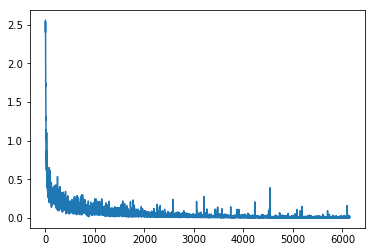

Train accuracy: 0.999780487804878
Test accuracy: 0.977


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from util import get_normalized_data


def init_weight(M1, M2):
  return np.random.randn(M1, M2) * np.sqrt(2.0 / M1)

"""
This is a new class that has been defined. We do not want to build a separate class 
just for batch norm, because it kind of goes in the middle of what a regular hidden layer 
does. A regular hidden layer does a linear transformation, and then passes the result through
and activation function. Well, batch norm happens in between those two operations, so it is 
better to just create a new class that does the same thing but with batch norm in between. 
"""
class HiddenLayerBatchNorm(object):
  def __init__(self, M1, M2, f):
    self.M1 = M1
    self.M2 = M2
    self.f = f

    # We don't need a bias term since batch norm makes it redundant
    W = init_weight(M1, M2).astype(np.float32)
    gamma = np.ones(M2).astype(np.float32)
    beta = np.zeros(M2).astype(np.float32)

    self.W = tf.Variable(W)
    self.gamma = tf.Variable(gamma)
    self.beta = tf.Variable(beta)

    # for test time
    self.running_mean = tf.Variable(np.zeros(M2).astype(np.float32), trainable=False)
    self.running_var = tf.Variable(np.zeros(M2).astype(np.float32), trainable=False)

  """
  Takes in X as usual, as well as is_training flag and decay parameter for updating running
  mean and running variance. So the first line here just does a linear transformation on the 
  input X with the weights W. Most of the work here is batch norm related. We first check if 
  is_training is true, and if it is, we then get the batch mean and batch variance of X. Then 
  we create the update operations for the running mean and running variance. Then we use the
  control dependency function to make sure that these updates are run whenever we do the batch
  norm operation. We then get the output of the batch normalization. Because this is training,
  we use the batch mean and variance here. Otherwise, if we are testing we use the running mean 
  and running variance. Finally, we pass the output through the activation function. 
  """
  def forward(self, X, is_training, decay=0.9):
    activation = tf.matmul(X, self.W)
    if is_training:
      batch_mean, batch_var = tf.nn.moments(activation, [0])
      update_running_mean = tf.assign(
        self.running_mean,
        self.running_mean * decay + batch_mean * (1 - decay)
      )
      update_running_var = tf.assign(
        self.running_var,
        self.running_var * decay + batch_var * (1 - decay)
      )
      
      with tf.control_dependencies([update_running_mean, update_running_var]):
        out = tf.nn.batch_normalization(
          activation,
          batch_mean,
          batch_var,
          self.beta,
          self.gamma,
          1e-4
        )
    else:
      out = tf.nn.batch_normalization(
        activation,
        self.running_mean,
        self.running_var,
        self.beta,
        self.gamma,
        1e-4
      )
    return self.f(out)


class HiddenLayer(object):
  def __init__(self, M1, M2, f):
    self.M1 = M1
    self.M2 = M2
    self.f = f
    W = np.random.randn(M1, M2) * np.sqrt(2.0 / M1)
    b = np.zeros(M2)
    self.W = tf.Variable(W.astype(np.float32))
    self.b = tf.Variable(b.astype(np.float32))

  def forward(self, X):
    return self.f(tf.matmul(X, self.W) + self.b)

"""
The main difference here is that when we loop through the hidden layer sizes, all of the 
hidden layers we create are the batch norm kind. However, the final layer is just a regular
hidden layer. 
"""
class ANN(object):
  def __init__(self, hidden_layer_sizes):
    self.hidden_layer_sizes = hidden_layer_sizes

  def set_session(self, session):
    self.session = session

  def fit(self, X, Y, Xtest, Ytest, activation=tf.nn.relu, learning_rate=1e-2, epochs=15, batch_sz=100, print_period=100, show_fig=True):
    X = X.astype(np.float32)
    Y = Y.astype(np.int32)

    # initialize hidden layers
    N, D = X.shape
    self.layers = []
    M1 = D
    for M2 in self.hidden_layer_sizes:
      h = HiddenLayerBatchNorm(M1, M2, activation)
      self.layers.append(h)
      M1 = M2
      
    # final layer
    K = len(set(Y))
    h = HiddenLayer(M1, K, lambda x: x)
    self.layers.append(h)

    if batch_sz is None:
      batch_sz = N


    # note! we will need to build the output differently
    # for train and test (prediction)

    # set up theano functions and variables
    tfX = tf.placeholder(tf.float32, shape=(None, D), name='X')
    tfY = tf.placeholder(tf.int32, shape=(None,), name='Y')

    # for later use
    self.tfX = tfX

    """
    When we get the logits we pass in is_training equals True. This is because the logits are 
    going to be used to calculate the cost, and the cost of course is going to be used for training
    Next, we create an optimizer to minimize the cost. 
    """
    # for training
    logits = self.forward(tfX, is_training=True)
    cost = tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits,
        labels=tfY
      )
    )
    # train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    # train_op = tf.train.RMSPropOptimizer(learning_rate, decay=0.99, momentum=0.9).minimize(cost)
    train_op = tf.train.MomentumOptimizer(learning_rate, momentum=0.9, use_nesterov=True).minimize(cost)
    # train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    """
    Also need to create test logits for making and testing our predictions. To get test logits 
    we call forward function with is_training equals false 
    """
    # for testing
    test_logits = self.forward(tfX, is_training=False)
    self.predict_op = tf.argmax(test_logits, 1)

    # accuracy = tf.reduce_mean(1.0*(tfY == tf.argmax(logits, 1)))

    # init the variables
    self.session.run(tf.global_variables_initializer())

    n_batches = N // batch_sz
    costs = []
    for i in range(epochs):
      if n_batches > 1:
        X, Y = shuffle(X, Y)
      for j in range(n_batches):
        Xbatch = X[j*batch_sz:(j*batch_sz+batch_sz)]
        Ybatch = Y[j*batch_sz:(j*batch_sz+batch_sz)]

        c, _, lgts = self.session.run([cost, train_op, logits], feed_dict={tfX: Xbatch, tfY: Ybatch})
        costs.append(c)
        if (j+1) % print_period == 0:
          acc = np.mean(Ybatch == np.argmax(lgts, axis=1))
          print("epoch:", i, "batch:", j, "n_batches:", n_batches, "cost:", c, "acc: %.2f" % acc)
          # print('dbg:', self.session.run(self.layers[0].running_mean).sum())

      print("Train acc:", self.score(X, Y), "Test acc:", self.score(Xtest, Ytest))
    
    if show_fig:
      plt.plot(costs)
      plt.show()

  """
  Now we have our forward function. We can't loop through all layers the same way,
  because batch norm layer takes in an is_training flag, and the non batch norm hidden 
  layer doesn't 
  """
  def forward(self, X, is_training):
    out = X
    for h in self.layers[:-1]:
      out = h.forward(out, is_training)
    out = self.layers[-1].forward(out)
    return out

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)

  def predict(self, X):
    return self.session.run(self.predict_op, feed_dict={self.tfX: X})



def main():
  # step 1: get the data and define all the usual variables
  X, Y = get_normalized_data()
  # Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.03)
  X, Y = shuffle(X, Y)
  Xtrain, Ytrain = X[:-1000], Y[:-1000]
  Xtest, Ytest = X[-1000:], Y[-1000:]

  ann = ANN([500, 300])

  session = tf.InteractiveSession()
  ann.set_session(session)

  ann.fit(Xtrain, Ytrain, Xtest, Ytest, show_fig=True)

  print("Train accuracy:", ann.score(Xtrain, Ytrain))
  print("Test accuracy:", ann.score(Xtest, Ytest))


if __name__ == '__main__':
  main()


---

<br>
# 5. Batch Normalization in Theano
Here we are going to make use of Theano's Batch Normalization Functions. They are located in the `bn` module. 

```
from theano.tensor.nnet.bn import batch_normalization_train,
batch_normalization_test
```

Unlike, the tensorflow version, which is slightly dumb because all it does is scaling and shifting, which is just multiplication and addition, theanos version is a bit smarter, and it also returns the batch mean and variance, as well as the updates for the running mean and running variance. So, whereas in tensorflow you had to code that yourself, theano is going to do that for you. In addition, theano has two separate functions, one for training and one for testing. 

So, in pseudocode it is very simple. You can imagine that we have a forward function for a neural network layer, and it is going to take in an is_training flag. 

```
def forward(X, is_training):
    a = X.dot(self.W)
    if is_training:
        out, batch_mean, batch_invstd, new_rn_mean, new_rn_var = batch_norm..n_train(
            a, self.gamma, running_mean=self.rn_mean, running_var=self.rn_var_)
    else:
        out = batch_norm..n_test(a, self.gamma, self.beta, self.rn_mean, self.rn_var)
    return self.f(out)
```

There is one thing that may still be confusing, however. Notice how batch_normalization_train returns 5 items, the 1st one being just the output of the normalization. It also returns the batch mean and batch variance, but in terms of the inverse standard deviation. And it also returns theano tensors, which represent the updated running mean and running variance. It is slightly odd that it returns the first scaled parameter in terms of inverse standard deviation, and the second in terms of variance. But, that is just the way theano developers decided to do it. 

## 5.1 Updating the running mean and variance
What we must remember is that in theano everything is in terms of a graph node. This can be thought of as a snapshot in time. We can think of the graph as sort of a snapshot in time. So, in this current iteration, we are getting some new graph node that represents the update for the running mean, and a new graph node that represents the update for the running variance. The important thing to remember is that we have to remember to pass these updates into the theano train function, so that these updates are actually made during training at the same time we do gradient descent on the rest of the parameters. This also means that we have to declare the running mean and variance as theano shared, just like all of the other parameters. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano
import theano.tensor as T
from theano.tensor.nnet.bn import batch_normalization_train, batch_normalization_test
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from util import get_normalized_data


def init_weight(M1, M2):
  return np.random.randn(M1, M2) * np.sqrt(2.0 / M1)


class HiddenLayerBatchNorm(object):
  def __init__(self, M1, M2, f):
    self.M1 = M1
    self.M2 = M2
    self.f = f

    W = init_weight(M1, M2)
    gamma = np.ones(M2)
    beta = np.zeros(M2)

    self.W = theano.shared(W)
    self.gamma = theano.shared(gamma)
    self.beta = theano.shared(beta)

    self.params = [self.W, self.gamma, self.beta]

    # for test time
    # self.running_mean = T.zeros(M2)
    # self.running_var = T.zeros(M2)
    self.running_mean = theano.shared(np.zeros(M2))
    self.running_var = theano.shared(np.zeros(M2))

  def forward(self, X, is_training):
    activation = X.dot(self.W)
    if is_training:
      # returns:
      #   batch-normalized output
      #   batch mean
      #   batch variance
      #   running mean (for later use as population mean estimate)
      #   running var (for later use as population var estimate)
      out, batch_mean, batch_invstd, new_running_mean, new_running_var = batch_normalization_train(
        activation,
        self.gamma,
        self.beta,
        running_mean=self.running_mean,
        running_var=self.running_var,
      )

      self.running_update = [
        (self.running_mean, new_running_mean),
        (self.running_var, new_running_var),
      ]

      # if you don't trust the built-in bn function
      # batch_var = 1 / (batch_invstd * batch_invstd)
      # self.running_update = [
      #   (self.running_mean, 0.9*self.running_mean + 0.1*batch_mean),
      #   (self.running_var, 0.9*self.running_var + 0.1*batch_var),
      # ]

    else:
      out = batch_normalization_test(
        activation,
        self.gamma,
        self.beta,
        self.running_mean,
        self.running_var
      )
    return self.f(out)


class HiddenLayer(object):
  def __init__(self, M1, M2, f):
    self.M1 = M1
    self.M2 = M2
    self.f = f
    W = init_weight(M1, M2)
    b = np.zeros(M2)
    self.W = theano.shared(W)
    self.b = theano.shared(b)
    self.params = [self.W, self.b]

  def forward(self, X):
    return self.f(X.dot(self.W) + self.b)


class ANN(object):
  def __init__(self, hidden_layer_sizes):
    self.hidden_layer_sizes = hidden_layer_sizes

  def fit(self, X, Y, Xtest, Ytest, activation=T.nnet.relu, learning_rate=1e-2, mu=0.9, epochs=15, batch_sz=100, print_period=100, show_fig=True):
    X = X.astype(np.float32)
    Y = Y.astype(np.int32)

    # initialize hidden layers
    N, D = X.shape
    self.layers = []
    M1 = D
    for M2 in self.hidden_layer_sizes:
      h = HiddenLayerBatchNorm(M1, M2, activation)
      self.layers.append(h)
      M1 = M2
      
    # final layer
    K = len(set(Y))
    h = HiddenLayer(M1, K, T.nnet.softmax)
    self.layers.append(h)

    if batch_sz is None:
      batch_sz = N

    # collect params for later use
    self.params = []
    for h in self.layers:
      self.params += h.params

    # for momentum
    dparams = [theano.shared(np.zeros_like(p.get_value())) for p in self.params]

    # note! we will need to build the output differently
    # for train and test (prediction)

    # set up theano functions and variables
    thX = T.matrix('X')
    thY = T.ivector('Y')

    # for training
    p_y_given_x = self.forward(thX, is_training=True)

    cost = -T.mean(T.log(p_y_given_x[T.arange(thY.shape[0]), thY]))
    prediction = T.argmax(p_y_given_x, axis=1)
    grads = T.grad(cost, self.params)

    # momentum only
    updates = [
      (p, p + mu*dp - learning_rate*g) for p, dp, g in zip(self.params, dparams, grads)
    ] + [
      (dp, mu*dp - learning_rate*g) for dp, g in zip(dparams, grads)
    ]
    for layer in self.layers[:-1]:
      updates += layer.running_update

    train_op = theano.function(
      inputs=[thX, thY],
      outputs=[cost, prediction],
      updates=updates,
    )

    # for testing
    test_p_y_given_x = self.forward(thX, is_training=False)
    test_prediction = T.argmax(test_p_y_given_x, axis=1)

    self.predict = theano.function(
      inputs=[thX],
      outputs=test_prediction,
    )

    n_batches = N // batch_sz
    costs = []
    for i in range(epochs):
      if n_batches > 1:
        X, Y = shuffle(X, Y)
      for j in range(n_batches):
        Xbatch = X[j*batch_sz:(j*batch_sz+batch_sz)]
        Ybatch = Y[j*batch_sz:(j*batch_sz+batch_sz)]

        c, p = train_op(Xbatch, Ybatch)
        costs.append(c)
        if (j+1) % print_period == 0:
          accuracy = np.mean(p == Ybatch)
          print("epoch:", i, "batch:", j, "n_batches:", n_batches, "cost:", c, "accuracy:", accuracy)

      print("Train acc:", self.score(X, Y), "Test acc:", self.score(Xtest, Ytest))
    
    if show_fig:
      plt.plot(costs)
      plt.show()

  def forward(self, X, is_training):
    out = X
    for h in self.layers[:-1]:
      out = h.forward(out, is_training)
    out = self.layers[-1].forward(out)
    return out

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)



def main():
  # step 1: get the data and define all the usual variables
  X, Y = get_normalized_data()
  # Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
  X, Y = shuffle(X, Y)
  Xtrain, Ytrain = X[:-1000], Y[:-1000]
  Xtest, Ytest = X[-1000:], Y[-1000:]

  ann = ANN([500, 300])
  ann.fit(Xtrain, Ytrain, Xtest, Ytest, show_fig=True)

  print("Train accuracy:", ann.score(Xtrain, Ytrain))
  print("Test accuracy:", ann.score(Xtest, Ytest))


if __name__ == '__main__':
  main()

Reading in and transforming data...
epoch: 0 batch: 99 n_batches: 410 cost: 0.18750284729579245 accuracy: 0.95
epoch: 0 batch: 199 n_batches: 410 cost: 0.23017411488664472 accuracy: 0.92
epoch: 0 batch: 299 n_batches: 410 cost: 0.13403766997594416 accuracy: 0.96
epoch: 0 batch: 399 n_batches: 410 cost: 0.19139914106256722 accuracy: 0.95
Train acc: 0.9608048780487805 Test acc: 0.935
epoch: 1 batch: 99 n_batches: 410 cost: 0.10756771071946547 accuracy: 0.97
epoch: 1 batch: 199 n_batches: 410 cost: 0.12503677000065 accuracy: 0.95
epoch: 1 batch: 299 n_batches: 410 cost: 0.2366165461319624 accuracy: 0.96
epoch: 1 batch: 399 n_batches: 410 cost: 0.13791277092562548 accuracy: 0.95
Train acc: 0.9785609756097561 Test acc: 0.952


---
# 6. Noise Perspective
We are now going to discuss another way in which batch normalization performs regularization. In particular we are going to talk about how batch norm is a type of noise injection, which we have looked at in this course already. 

Here is how it works: When we are doing batch norm, we use $\mu_B$ and $\sigma_B$ as though they are the true values, $\mu_{true}$ and $\sigma_{true}$. Of course, we can never really know these true values. 

However, you can see that if we knew the true $\mu$ and $\sigma$, and we used these during training and testing, then training and testing would be exactly the same; we would always be subtracting the same $\mu$ and the same $\sigma$. 

$$\hat{X} = \frac{X - \mu_{true}}{\sigma_{true}}$$
$$Y = \hat{X}\gamma + \beta$$

This stems from the fact that the batch norm transformation is exactly the same during training and testing. The only difference is how we calculate the $\mu$s and $\sigma$s.

## 6.1 Noise
One way to think of any estimate, as you know from general machine learning principles, is that an estimate is equal to its true value plus noise:

$$Estimate = True \; Value + Noise$$

So, we can say that:
$$\mu_B = \mu_{true} + \epsilon$$
$$\sigma_B = \sigma_{true} + \epsilon$$

Hence, batch norm is a way of doing noise injection at the level of the batch $\mu$ and batch $\sigma$. This makes sense in the context that noise injection can really work anywhere in the neural network-whether we add noise to the inputs, or to the weights, or simply drop nodes in the network, all of these are adding noise. 